# Recurrent Neural Networks

## Part 1: Preprocess the data.
In the csv files, you will find several columns. you only need the "close" column for this exercise


reshape the data! see examples

In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries


# Importing the training set


# Creating a data structure with 30 timesteps and 1 output


# Reshaping [samples,timesteps,features]
# remember: samples: how many observations you have
#           timesteps: how long does the rnn remember (30 in our case)
#           features: how many variables (1 in our case)


In [2]:
import pandas as pd

In [17]:
# train
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
close_train = df_train['Close']
close_train = close_train.astype(str).str.replace(',', '')
close_train = pd.to_numeric(close_train)
close_train.index = df_train['Date']

# test
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
close_test = df_test['Close']
close_test = close_test.astype(str).str.replace(',', '')
close_test = pd.to_numeric(close_test)
close_test.index = df_test['Date']

print(close_train.head())
print(close_train.shape)
print()
print(close_test.head())
print(close_test.shape)

Date
1/3/2012    663.59
1/4/2012    666.45
1/5/2012    657.21
1/6/2012    648.24
1/9/2012    620.76
Name: Close, dtype: float64
(1258,)

Date
1/3/2017    786.14
1/4/2017    786.90
1/5/2017    794.02
1/6/2017    806.15
1/9/2017    806.65
Name: Close, dtype: float64
(20,)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000262FCA61A08>],
      dtype=object)

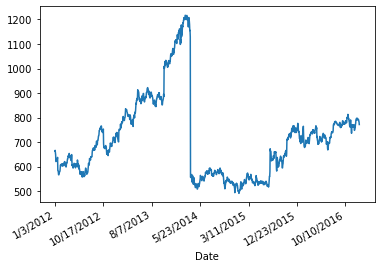

In [18]:
close_train.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000262FB852AC8>],
      dtype=object)

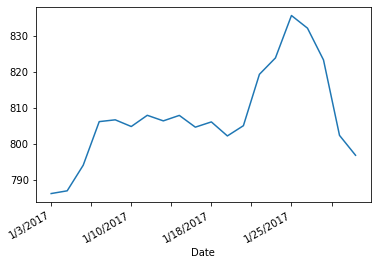

In [19]:
close_test.plot(subplots=True)

In [25]:
# https://www.tensorflow.org/tutorials/structured_data/time_series

## part 2: model building
Build The RNN, you can use LSTM or GRU

In [6]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages


# Initialising the RNN


# Compiling the RNN

# Fitting the RNN to the Training set


In [21]:
from keras import models, layers

Using TensorFlow backend.


#### LSTM

In [ ]:
lstm_model = models.Sequential([
    layers.LSTM(32, )
    
])

## Part 3: Making Predictions
make predictions in the Test dataset